In [21]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
   color: white;
}
.jp-OutputArea-output {
   background-color: transparent;
} 

:root {
   --jp-content-font-color0: white;
   --jp-content-font-color1: white;
}
</style>


In [91]:
import matplotlib.pyplot as plt

plt.rcParams["patch.facecolor"] = (1, 1, 1, .5)
plt.rcParams["axes.facecolor"] = (1, 1, 1, .5)

# Introduction

## Complex numbers

A complex number is a number that can be expressed in the form $z = a + jb$, where *a* and *b* are real numbers, and *j* is the imaginary unit, satisfying the equation $j^2 = -1$. Because no real number satisfies this equation, *j* is called an imaginary number. For the complex number $z = a + jb$, *a* is called the **real part**, and *b* is called the **imaginary part**.

### Representations of Complex Numbers

There are two common ways to represent a complex number: rectangular form and polar form.

#### Rectangular Form
The rectangular form is the $z = a + jb$ form we've already seen.

#### Polar Form
A complex number can also be represented in polar form, which is given by its magnitude (or modulus) *r* and its angle (or phase) *θ*.

The magnitude *r* is the distance from the origin to the point (a, b) in the complex plane, and is given by:
$r = |z| = \sqrt{a^2 + b^2}$

The angle *θ* is the angle of the line from the origin to the point (a, b) with the positive real axis, and is given by:
$\theta = \arg(z) = \operatorname{atan2}(b, a)$

The polar form of a complex number *z* is:
$z = r(\cos\theta + j\sin\theta)$

### Euler's Formula
Euler's formula provides a powerful connection between complex exponentials and trigonometric functions:
$e^{j\theta} = \cos\theta + j\sin\theta$

Using Euler's formula, we can express the polar form of a complex number in a more compact exponential form:
$z = r e^{j\theta}$

In [54]:
import numpy as np
from ipywidgets import interactive, fixed

import matplotlib.pyplot as plt

def plot_complex(a=1.0, b=1.0):
    """
    Plots a complex number z = a + jb on the complex plane.
    """
    # Calculate polar coordinates
    r = np.sqrt(a**2 + b**2)
    theta = np.arctan2(b, a)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    
    # Set plot limits and labels
    lim = max(5, r * 1.2)
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.grid(True)
    ax.set_xlabel("Real Part (a)")
    ax.set_ylabel("Imaginary Part (b)")
    
    # Draw axes
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    
    # Plot the vector representing the complex number
    ax.arrow(0, 0, a, b, head_width=0.2, head_length=0.3, fc='r', ec='r', length_includes_head=True)
    
    # Add text annotations
    title = f"Complex Number Visualization"
    info_text = (
        f"Rectangular: $z = {a:.2f} + j{b:.2f}$\n"
        f"Polar: $z = {r:.2f} \\angle {np.degrees(theta):.2f}^\\circ = {theta:.2f}$rad\n"
        f"Exponential: $z = {r:.2f} e^{{{theta:.2f}j}}$"
    )
    ax.set_title(title)
    # Position the text box in the upper left corner
    ax.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    plt.show()

# Create interactive sliders for 'a' and 'b'
interactive_plot = interactive(plot_complex, 
                               a=(-5.0, 5.0, 0.1), 
                               b=(-5.0, 5.0, 0.1))

# Display the widget
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0), FloatSlider(value=1.0, descr…

## 2. Signals

In engineering and physics, a signal is defined as any physical quantity that varies in time, space, or any other independent variable, and carries information.

### Signal Classification: Continuous-Time vs. Discrete-Time

Signals are primarily classified based on the nature of their independent variable (often time, $t$, or a sample index, $n$).

#### A. Continuous-Time (CT) Signals
A continuous-time signal, $x(t)$, is defined for every value of time $t$. The independent variable $t$ is continuous and belongs to the set of real numbers ($\mathbb{R}$).

* **Notation:** $x(t): \mathbb{R} \to \mathbb{R}$ (or $\mathbb{C}$, if the amplitude is complex).
* **Examples:** Voltage from a microphone, pressure from a sound wave, or the displacement of a pendulum.
* **Mathematical Form:** Often described by functions like $x(t) = A \cos(\omega t)$ or $x(t) = e^{-\alpha t} u(t)$.

#### B. Discrete-Time (DT) Signals
A discrete-time signal, $x[n]$, is defined only at integer values of the independent variable $n$. This often arises from sampling a CT signal. The index $n$ is discrete and belongs to the set of integers ($\mathbb{Z}$).

* **Notation:** $x[n]: \mathbb{Z} \to \mathbb{R}$ (or $\mathbb{C}$).
* **Examples:** Pixel values in a digital image, daily stock prices, or sampled audio data.
* **Mathematical Form:** Represented by sequences, such as $x[n] = (0.5)^n u[n]$.

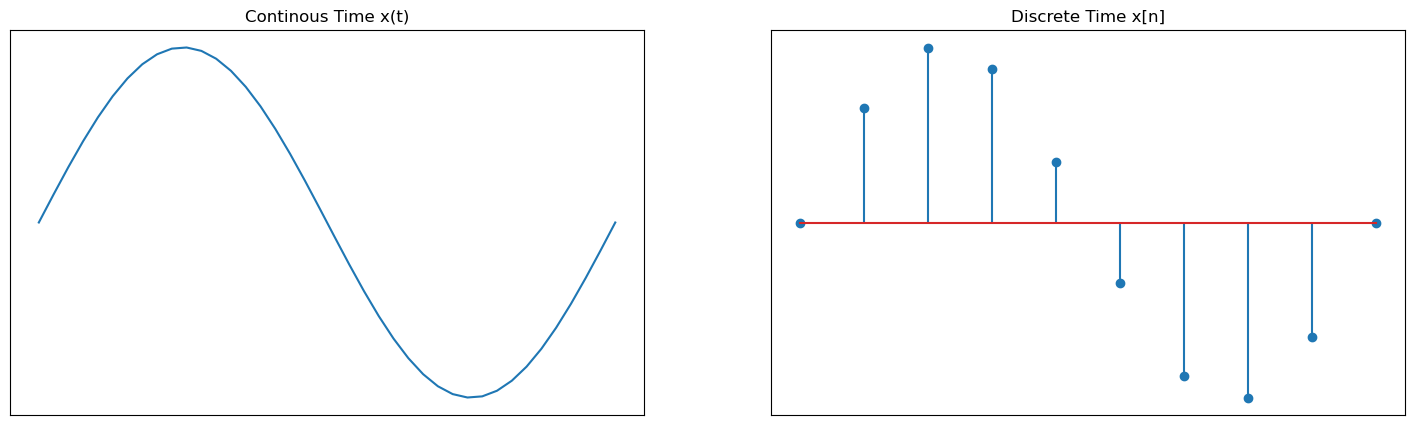

In [92]:
plt.gcf().set_size_inches(18, 5)

t = np.linspace(0, 1, 40)
t1 = np.linspace(0, 1, 10)

plt.subplot(121)
plt.plot(t, np.sin(2 * np.pi * t))
plt.title("Continous Time x(t)")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.stem(t1, np.sin(2 * np.pi * t1))
plt.xticks([])
plt.yticks([])
plt.title("Discrete Time x[n]")

plt.show()

## 3. Basic Signal Transformations

A fundamental step in analyzing signals is understanding how the independent variable can be transformed. These transformations manipulate the timing or position of the signal, not its amplitude.

We will focus on transformations of the independent variable (time, $t$ or $n$).

### 3.1 Time Shift (Translation)
A time shift moves the signal forward or backward along the time axis.

| Transformation | Continuous-Time | Discrete-Time | Effect on Signal |
| :--- | :--- | :--- | :--- |
| **Delay** | $y(t) = x(t - t_0)$ where $t_0 > 0$ | $y[n] = x[n - n_0]$ where $n_0 > 0$ | Shifts the signal to the **right** (later in time). |
| **Advance** | $y(t) = x(t + t_0)$ where $t_0 > 0$ | $y[n] = x[n + n_0]$ where $n_0 > 0$ | Shifts the signal to the **left** (earlier in time). |

***Example:** If $x(t)$ peaks at $t=5$, then $x(t-2)$ peaks at $t=7$ (delayed).

In [ ]:

def update(c):
     t = np.linspace(-7, 7, 1000)

     plt.plot(t, .7 * np.exp(-1 * (t - c)**2))
     plt.ylim(0, 1)
     plt.grid()
     plt.title("x(t-c)")
     plt.gcf().set_size_inches(18, 5)
     plt.gca().set_yticklabels([])

interact(update, c=(-5, 5, .05))

interactive(children=(FloatSlider(value=0.0, description='c', max=5.0, min=-5.0, step=0.05), Output()), _dom_c…

<function __main__.update(c)>

### 2.2 Time Reversal (Reflection)
Time reversal flips the signal horizontally around the vertical axis ($t=0$ or $n=0$).

| Transformation | Continuous-Time | Discrete-Time | Effect on Signal |
| :--- | :--- | :--- | :--- |
| **Reflection** | $y(t) = x(-t)$ | $y[n] = x[-n]$ | Flips the signal across the vertical axis. |

**Example:** A signal starting at $t=0$ and decaying for $t>0$, becomes a signal starting at $t=0$ and decaying for $t<0$ after reflection.